In [1]:
import ipywidgets as widgets
from IPython.display import Image, display, clear_output
import functools
import shutil
from glob import glob

In [ ]:
# Get frames.

import cv2
import os
from glob import glob

img_fold_path = 'data_frames' # Store all generated frames in this folder
if os.path.exists(img_fold_path)==False:
    os.mkdir(img_fold_path)
    
vidcap = cv2.VideoCapture('31_One-Pot_Recipes-M61viP3prdQ.mp4')
def getFrame(sec, i):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite(img_fold_path + "/"+str(i)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0

#it will capture image in each 0.5 second
frameRate = 0.5        
i = 0
success = getFrame(sec, i )

while success:
    i = i+1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec, i)

In [2]:
# global variables

# initialize  action classes
action_classes = {}
class_names = ['stirring', 'adding', 'unknown']
for class_name in class_names:
    action_classes[class_name] = widgets.Checkbox(value=False, description=class_name, disabled=False) 
    
# all img_paths
img_paths = glob('data_frames/*')
dest_path = 'classification_data/'

In [3]:
def on_action_class_clicked(b):
    global img_paths
    global action_classes
    print(b)
    if (b['owner'].value) == True:
        action_classes[b['owner'].description].unobserve(on_action_class_clicked)
        action_classes[b['owner'].description].value = False
        clear_output()
        tmp_path = img_paths[-1]
        shutil.move(tmp_path, dest_path + b['owner'].description + '/'+ tmp_path.split('/')[-1])
        img_paths.pop(-1)
        print("IMG left: ",len(img_paths))
        if len(img_paths)>=1:
            display(Image(img_paths[-1]))
            display(widgets.GridBox(list(action_classes.values()),layout=widgets.Layout(grid_template_columns = "repeat(3,150px)")))
            action_classes[b['owner'].description].observe(on_action_class_clicked, names=["value"])      

IMG left:  3826


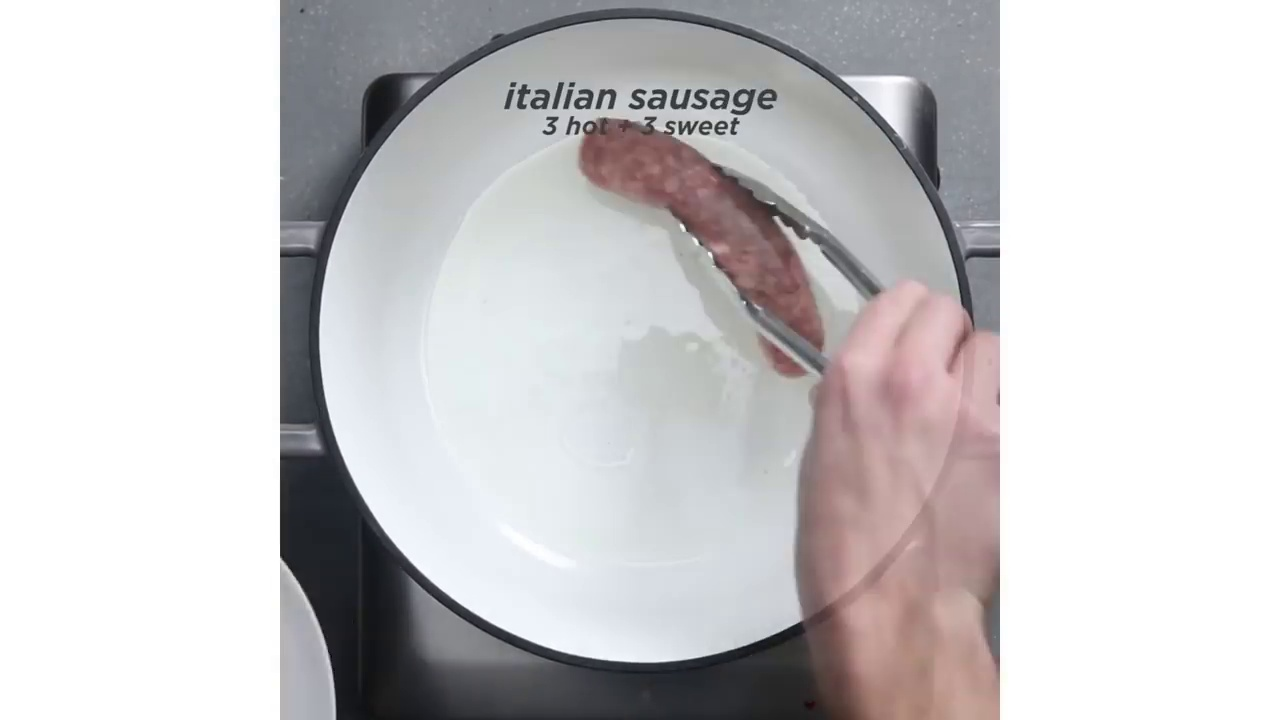

GridBox(children=(Checkbox(value=False, description='stirring'), Checkbox(value=False, description='adding'), …

In [4]:
display(Image(img_paths[-1]))
display(widgets.GridBox(list(action_classes.values()),layout=widgets.Layout(grid_template_columns = "repeat(3,150px)")))
for class_name in class_names:
    action_classes[class_name].value = False
    action_classes[class_name].observe(on_action_class_clicked, names=["value"])